In [99]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
import seaborn as sns
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import skfuzzy as fuzz
import umap
data = pd.read_csv('../DATASET/Hasil_Gabungan.csv')

featuress = [
    'Residential_2021', 'Industrial_2021', 'Business_2021', 'Social_2021', 'Gov_Office_2021', 
    'Pub_Street_2021', 'Total_2021', 'Residential_2022', 'Industrial_2022', 'Business_2022', 
    'Social_2022', 'Gov_Office_2022', 'Pub_Street_2022', 'Total_2022', 'Residential', 
    'Industrial', 'Business', 'Social', 'Gov_Office', 'Pub_Street', 'Total', 
    'JP_2021', 'JP_2022', 'JP_2023', 'KP_2021', 'KP_2022', 'KP_2023'
]

data_T = data[featuress]
scaler = RobustScaler()
scaled_features = scaler.fit_transform(data_T)
provinsi = data['Province'].tolist()

In [100]:
dbscan = DBSCAN(eps=9, min_samples=16)
clusters = dbscan.fit_predict(scaled_features)
data['Cluster'] = clusters
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
dbscan_labels = clusters.copy()
dbscan_labels[clusters == -1] = num_clusters 

data['Cluster'] = dbscan_labels

provinsi_cluster = data[['Province', 'Cluster']]
for cluster in set(dbscan_labels):
    print(f"\nProvinsi yang masuk dalam Cluster {cluster}:")
    print(provinsi_cluster[provinsi_cluster['Cluster'] == cluster]['Province'].to_list())

num_clusters_modified = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
num_outliers_modified = list(dbscan_labels).count(num_clusters)  

print(f"\nJumlah klaster yang ditemukan setelah modifikasi (termasuk outliers sebagai klaster): {num_clusters_modified}")
print(f"Jumlah outlier yang dianggap klaster baru: {num_outliers_modified}")

if num_clusters_modified > 1:
    sil_score = silhouette_score(scaled_features, dbscan_labels)
    print(f"Silhouette Score: {sil_score}")
else:
    print("Silhouette Score tidak dapat dihitung karena hanya ada 1 klaster atau semua data dianggap outliers.")



Provinsi yang masuk dalam Cluster 0:
['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Sulawesi Utara', 'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Barat', 'Maluku', 'Maluku Utara', 'Papua', 'Papua Barat', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']

Provinsi yang masuk dalam Cluster 1:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']

Jumlah klaster yang ditemukan setelah modifikasi (termasuk outliers sebagai klaster): 2
Jumlah outlier yang dianggap klaster baru: 5
Silhouette Score: 0.8098681704159247


In [101]:
kmeans = KMeans(n_clusters=2, random_state=42)  
kmeans_labels = kmeans.fit(scaled_features) 
data_T['Cluster'] = kmeans.labels_
data['Cluster'] = data_T['Cluster'] 
provinsi_cluster = data[['Province', 'Cluster']]
for cluster in np.unique(kmeans.labels_):
    print(f"Provinsi dalam Klaster {cluster}:")
    print(provinsi_cluster[provinsi_cluster['Cluster'] == cluster]['Province'].tolist())


silhouett = silhouette_score(scaled_features, kmeans.labels_)

print(f"Silhouette Score: {silhouett}")

Provinsi dalam Klaster 0:
['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Sulawesi Utara', 'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Barat', 'Maluku', 'Maluku Utara', 'Papua', 'Papua Barat', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']
Provinsi dalam Klaster 1:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']
Silhouette Score: 0.8098681704159247


C:\Users\Jeff\AppData\Local\Temp\ipykernel_8768\2247513633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_T['Cluster'] = kmeans.labels_


In [102]:
kmeans_init = KMeans(n_clusters=3).fit(scaled_features)
xmodel = xmeans(scaled_features.tolist(), kmeans_init.cluster_centers_.tolist(), kmax=10)
xmodel.process()
xclusters = xmodel.get_clusters()
xlabels = np.zeros(len(scaled_features))
for i, cluster in enumerate(xclusters):
    for idx in cluster:
        xlabels[idx] = i

In [103]:
n_clusters =3

cntr, u, _, _, _, _, _ = fuzz.cmeans(scaled_features.T, c=n_clusters, m=1.5, error=0.001, maxiter=100, init=None)

fcm_labels = np.argmax(u, axis=0)

cluster_provinces = {}
provinces = data['Province'].tolist()  

for cluster_idx in range(n_clusters):
    cluster_provinces[cluster_idx] = [provinces[i] for i in range(len(fcm_labels)) if fcm_labels[i] == cluster_idx]

for cluster_idx, provinces_in_cluster in cluster_provinces.items():
    print(f"Cluster {cluster_idx + 1}: {', '.join(provinces_in_cluster)}")

sil_score = silhouette_score(scaled_features, fcm_labels)
print(f"Silhouette Score: {sil_score}")

Cluster 1: Jawa Timur, Jawa Tengah, Jawa Barat, Banten
Cluster 2: DKI Jakarta
Cluster 3: Aceh, Sumatera Utara, Sumatera Barat, Riau, Kep. Riau, Sumatera Selatan, Jambi, Bengkulu, Kep. Bangka Belitung, Lampung, Kalimantan Barat, Kalimantan Selatan, Kalimantan Tengah, Sulawesi Utara, Gorontalo, Sulawesi Tengah, Sulawesi Selatan, Sulawesi Tenggara, Sulawesi Barat, Maluku, Maluku Utara, Papua, Papua Barat, Bali, Nusa Tenggara Barat, Nusa Tenggara Timur, DI Yogyakarta, Kalimantan Timur, Kalimantan Utara
Silhouette Score: 0.8134610115525492


In [104]:
medoids = np.random.choice(len(scaled_features), size=3, replace=False).tolist()
kmed = kmedoids(scaled_features, medoids, metric=distance_metric(type_metric.EUCLIDEAN))
kmed.process()
kclusters = kmed.get_clusters()
klabels = np.zeros(len(scaled_features))
for i, cluster in enumerate(kclusters):
    for idx in cluster:
        klabels[idx] = i

c:\Users\Jeff\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Jeff\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


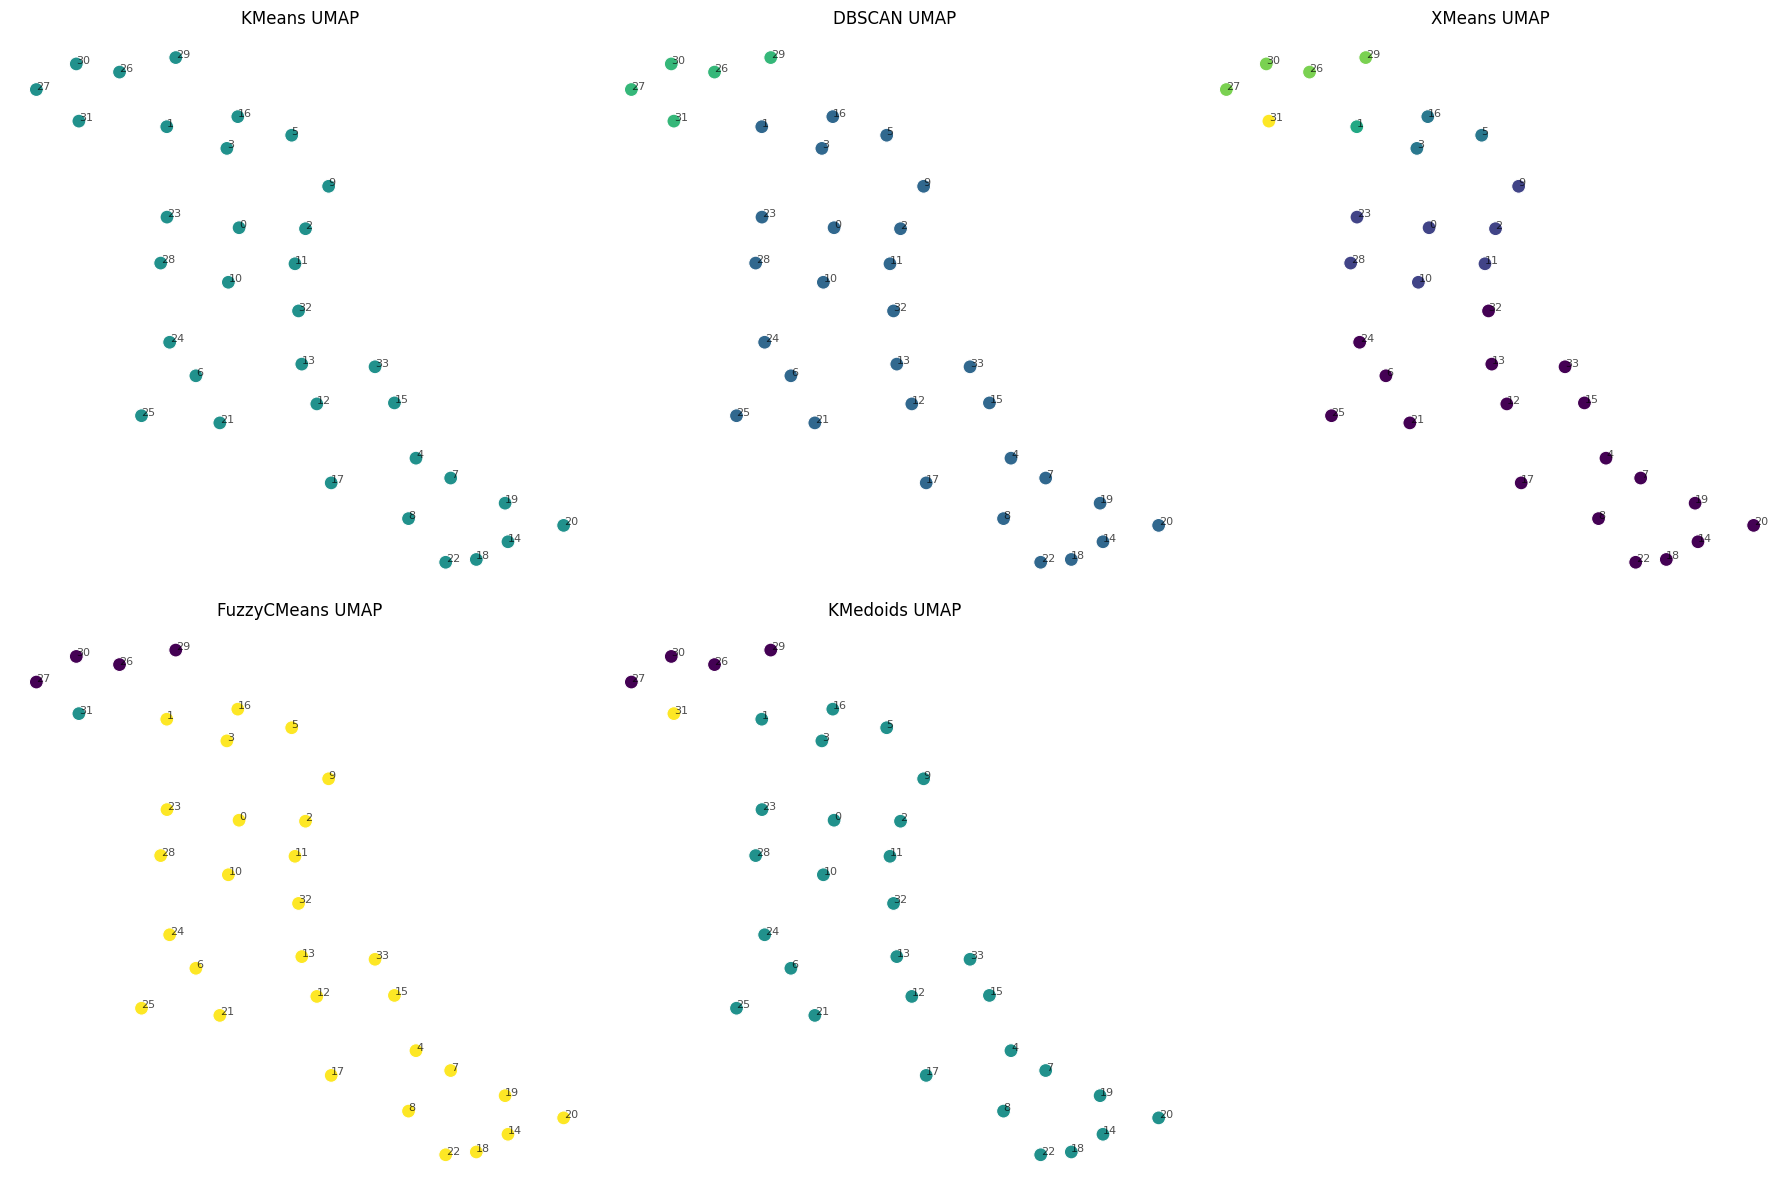

In [105]:
umap_result = umap.UMAP(random_state=42).fit_transform(scaled_features)
df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
df['KMeans'] = kmeans_labels
df['DBSCAN'] = dbscan_labels
df['XMeans'] = xlabels
df['FuzzyCMeans'] = fcm_labels
df['KMedoids'] = klabels
df['Provinsi'] = provinsi

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
models = ['KMeans', 'DBSCAN', 'XMeans', 'FuzzyCMeans', 'KMedoids']
positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1)]

for model, pos in zip(models, positions):
    ax = axes[pos]
    sns.scatterplot(data=df, x='UMAP1', y='UMAP2', hue=model, palette='viridis', s=100, legend=None, ax=ax)
    for i in range(len(df)):
        ax.text(df.loc[i, 'UMAP1'], df.loc[i, 'UMAP2'], str(i), fontsize=8, alpha=0.7)
    ax.set_title(f'{model} UMAP')
    ax.axis('off')

axes[1, 2].axis('off') 
plt.tight_layout()
plt.show()

In [106]:
from sklearn.metrics import silhouette_score

eval_results = []

models = {
    'KMeans': kmeans.labels_,
    'XMeans': xlabels,
    'FCM': fcm_labels,
    'DBSCAN': dbscan_labels,
    'KMEDOIDS': klabels
}

for model_name, labels in models.items():
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    try:
        score = silhouette_score(scaled_features, labels)
    except:
        score = "N/A"
    eval_results.append({
        'Model': model_name,
        'Jumlah Cluster': n_clusters,
        'Silhouette Score': score
    })

eval_df = pd.DataFrame(eval_results)
display(eval_df)


,Model,Jumlah Cluster,Silhouette Score
0,KMeans,2,0.809868
1,XMeans,6,0.381790
2,FCM,3,0.813461
3,DBSCAN,2,0.809868
4,KMEDOIDS,3,0.813461


In [108]:
model_labels = {
    "KMeans": kmeans.labels_,
    "XMeans": xlabels,
    "DBSCAN": dbscan_labels,
    "FCM": fcm_labels,
    'KMEDOIDS': klabels
}

cluster_counts = []
for model_name, labels in model_labels.items():
    unique_clusters = sorted(set(labels))
    counts = {f'Cluster {int(c)}': list(labels).count(c) for c in unique_clusters}
    counts['Model'] = model_name
    counts['Total Provinsi'] = len(labels)
    cluster_counts.append(counts)

cluster_counts_df = pd.DataFrame(cluster_counts).fillna(0).astype({"Total Provinsi": int})
ordered_cols = ['Model', 'Total Provinsi'] + sorted([col for col in cluster_counts_df.columns if col not in ['Model', 'Total Provinsi']])
cleaned_cluster_counts_df = cluster_counts_df[ordered_cols]

print(cleaned_cluster_counts_df)

      Model  Total Provinsi  Cluster 0  Cluster 1  Cluster 2  Cluster 3  \
0    KMeans              34         29          5        0.0        0.0   
1    XMeans              34         18          7        3.0        1.0   
2    DBSCAN              34         29          5        0.0        0.0   
3       FCM              34          4          1       29.0        0.0   
4  KMEDOIDS              34          4         29        1.0        0.0   

   Cluster 4  Cluster 5  
0        0.0        0.0  
1        4.0        1.0  
2        0.0        0.0  
3        0.0        0.0  
4        0.0        0.0  
